# House Pricing - A Statistical Analysis & Machine Learning

We will work on this step by step.
Topics:
1. Data Preparation
2. Data Analysis
3. Statistical Tests
4. Implement a linear regression model
5. Exploring model results
6. Some visualzations

Importing necessary libraries and functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
plt.style.use('seaborn')
sns.set(palette='bright')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.4f}'.format

In [1]:
from pagayapro.data_paths.data_paths import ASSIGNMENT1_DATA

## Load the datasets

load the data.

In [6]:
data = pd.read_csv(os.path.join(ASSIGNMENT1_DATA, "assignment1_data.csv"))
data.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.shape

(1460, 81)

## Split to train and test

We will split the data to train and test.
<br>We can't perform statistical analysis which includes the test data, since that would lead to **overfitting** on the test set (we will elaborate on that later on). Therfore we will first split the data.

In [6]:
train = data.sample(frac=0.8,random_state=1) # random_state is the random_seed
test = data.drop(train.index)

## Explore the data

### Number of rows and columns

Find how many rows and columns we have in train and test

### Present a statistical description of the numerical features

Write down the mean, std, quantiles, etc of each of these features (can be done in one line of code)

### General questions on the data:

How many features are numerical? 

What is the median of the LotFrontage feature?


What is the feature with the largest standard deviation?

What is data the type of each feature?

As you can see there are multiple types of features.   
Most of the features are object type (includes string values in the variable).

### Correlations

Linear regression assumes a linear relation between every feature and the target variable.
First, we want to calculate the Pearson Correlation: 

Find the correlation of all the features with the target variable (i.e. SalePrice) in the training set.

Sort the features according to the absolute value of their correlation with SalePrice

So we see that **'OverallQual'** is the most correlated feature. Let's put it in a scatter plot with the target variable and see how it looks.

**SalePrice vs OverallQual**

In [7]:
def create_scatterplot(y, x):
    plt.subplots(figsize = (12,8))
    sns.scatterplot(y = y, x = x);

**Optional** use the function above to create your scatter plots

Generally, a scatter plot is not the best way to visualize categorical variables. However; **OverallQual** is an **ordinal** variable, which means that its categories have a specific order (for example 8 is better than 7), so a scatter plot does make sense in this case. In the graph above we can see that there is an apparent relationship between the two features. The price of the houses increases with the overall quality. Let's examine a few more features to determine the outliers. Let's focus on the numerical variables this time.

**SalePrice vs GrLivArea**

create a scatter plot of SalePrice vs GrLivArea

As you can see, there are two outliers in the plot above. We will get rid off them later (and discuss why we should do this???). Let's look at another scatter plot with a different feature.

**SalePrice vs TotalBsmtSF**

**SalePrice vs 1stFlrSF**

## What have we discovered so far?

* Our target variable shows an unequal level of variance across most features. This is called **Heteroscedasticity (will be elaborated later)** and is a red flag for the multiple linear regression model.
* There are some outliers in the scatter plots.
<br>**NOTE:** what does it mean? I have no idea.
<br>Let's deal with these outliers by removing them from the data

Remove the two outliers we found in the SalePrice-GrLivArea plot

# Assumptions of Regression

* **Linearity** 
* **Homoscedasticity (Constant Error Variance vs Heteroscedasticity).**
* **The target variable is normally distributed when the features values are fixed.**
* **Multivariate Normality (Normality of Errors).**
* **No or little Multicollinearity.** 

Since we fit a linear model, we assume that the relationship between the features and the target is **linear**, and the errors, or residuals, are pure random fluctuations around the true line.    
We expect that the variability in the dependent variable doesn't increase as the value of the features increases, which is the assumptions of equal variance, also known as **Homoscedasticity**.  
We also assume that the observations are independent of one another (**No Multicollinearity**), and that there is no correlation between sequential observations.

These assumptions often happen simultaneously. In other words, if we see that one of these assumptions holds in the dataset, it's more likely that other assumptions mentioned above will hold as well.  
Therefore, we can find and fix various assumptions with a few unique techniques.

So, **How do we check regression assumptions? We fit a regression line and look for the variability of the response data along the regression line.** 

## Linearity

Linear regression requires the relationship between each independent variable and the dependent variable to be linear.  
The linearity assumption can be tested with scatter plots.  
The following example depicts a case where little linearity is present. 

Scatter plotting for SalePrice and GrLivArea

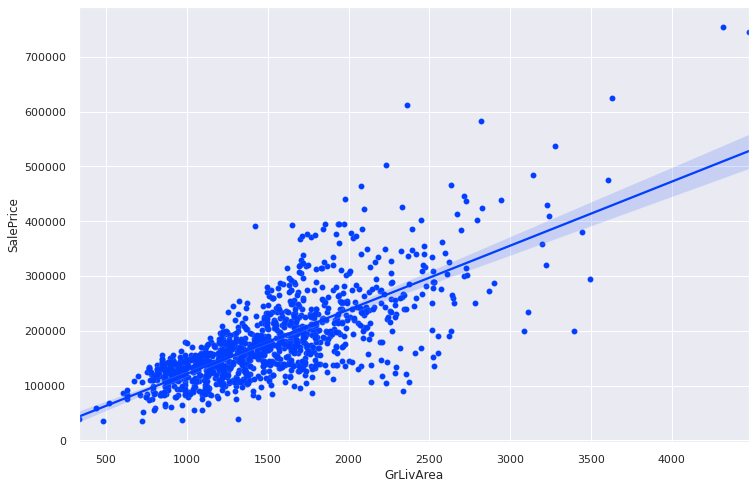

In [70]:
fig, ax1 = plt.subplots(figsize = (12,8), ncols=1,sharey=False)
sns.scatterplot(x = train['GrLivArea'], y = train['SalePrice'],  ax=ax1)
sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], ax=ax1); # plot a regression line. 

Interpert the blue strip in the graph above. How well does a linear model fit the data? Does this graph support the homoscedasticity assumtion?

Sometimes we may be trying to fit a linear regression model when the data might not be so linear, or the function may need another degree of freedom to fit the data.  
In that case, we may need to change our model depending on the data to get the best possible fit.  

## Homoscedasticity

**Homoscedasticity (Constant Variance):** 
Homoscedasticity describes a situation in which the error/variance/noise in the relationship between the independent variables and the dependent variable is the same across all values of the independent variable.  
In other words, there is a constant variance present in the response variable as the predictor variable increases.  
If the "noise" is not the same across the values of an independent variable, we call that **Heteroscedasticity**.  
As you can guess, it is the opposite of **Homoscedasticity.**


<p><img src="https://www.dummies.com/wp-content/uploads/415147.image1.jpg" style="float:center"></img></p>

This plot above is an excellent example of Homoscedasticity.  

As you can see, the residual variance is the same as the value of the predictor variable increases.  
One way to fix this Heteroscedasticity is by using a transformation method like log-transformation. We will do that later.

In the **GrLivArea**-**SalePrice** scatter plot we see that, as the value of **GrLivArea** 
increases, the variance also increases (i.e. we have heteroscedasticity).

### Let's look at the target - SalePrice

Plot a histogram of the label (=target variable)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

It seems that the distribution is not symmetric and might have some outliers. Another way of visualizing this is by using a boxpot. 

In [ ]:
sns.boxplot(train.loc[:,'SalePrice'], orient='v');
plt.title('Box Plot');

These **two** charts above can tell us a lot about our target variable:
* Our target variable, **SalePrice** does not seem to be normally distributed.
* The target variable is right-skewed. 
* There are multiple outliers in the variable.

### Skewness

Skewness is an important attribute of a normal distribtution

<b>Skewness</b> 
According to Wikipedia, 

* "In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.

* For a unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right. In cases where one tail is long but the other tail is fat, skewness does not obey a simple rule. For example, a zero value means that the tails on both sides of the mean balance out overall; this is the case for a symmetric distribution, but can also be true for an asymmetric distribution where one tail is long and thin, and the other is short but fat."

The following image illustrates the concept of skewness:  
![image](https://cdn-images-1.medium.com/max/1600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)

Find out the skewness of our label

So, now we can see that there is quite a bit of Skewness in the target variable.  
This might indicate that some transformation is needed on our target variable. 
Right Skewness can usually be fixed by using log transformation.

### Fixing skewness

Now, let's draw the same graphs from above but this time we'll first transform the target variable using a log function 

Create a new column in your train dataframe **logSalePrice** and set it as the log of the label

Plot the distribution of **logSalePrice**

Create a box-plot of **logSalePrice**

Create a scatter plot of **GrLivArea** vs **logSalePrice**. Is the heteroscedasticity different the new scatter plot?

As you can see, the log transformation fixes the heteroscedasticity of the target variable.

## The target variable is normally distributed when the features values are fixed

In plain words, we want to make sure that for each $x_0$ value of the feature $X$, $Y\mid_{X=x_0}$ is a random variable following a normal distribution and its mean lies on the regression line.

Let's choose one of the values of 'OverallQual' feature:  
Do the following for SalePrice and logSalePrice:
1. Plot histogram of the target for OverallQual == 8
2. Check the skewness

SalePrice

logSalePrice

So, as we can see the log transforamtion makes the target variable follow our assumption more closely.

Select additional features and values and check the distibution of the label and its log-transformation given those values

## No or Little multicollinearity

Multicollinearity is when there is a strong correlation between independent variables. Linear regression or multilinear regression requires independent variables to have few or no similar features. Multicollinearity can lead to a variety of problems, including:
* The effect of predictor variables estimated by our regression will depend on what other variables are included in our model. 
* Predictors can have wildly different results depending on the observations in our sample, and small changes in samples can result in very different estimated effects. 
* We can no longer interpret a coefficient on a variable as the effect on the target of a one-unit increase in that variable holding the other variables constant. The reason behind that is, when predictors are strongly correlated, there is no scenario in which one variable can change without a conditional change in another variable.

A very common way to visualize correlations is using a heat map. An even better way is a clustermap which also allows you to see whether there is multicollinearity or not. We'll discuss methods for solving multicollinearity (such as ridge and lasso methods) later on.

<Figure size 2160x2160 with 0 Axes>

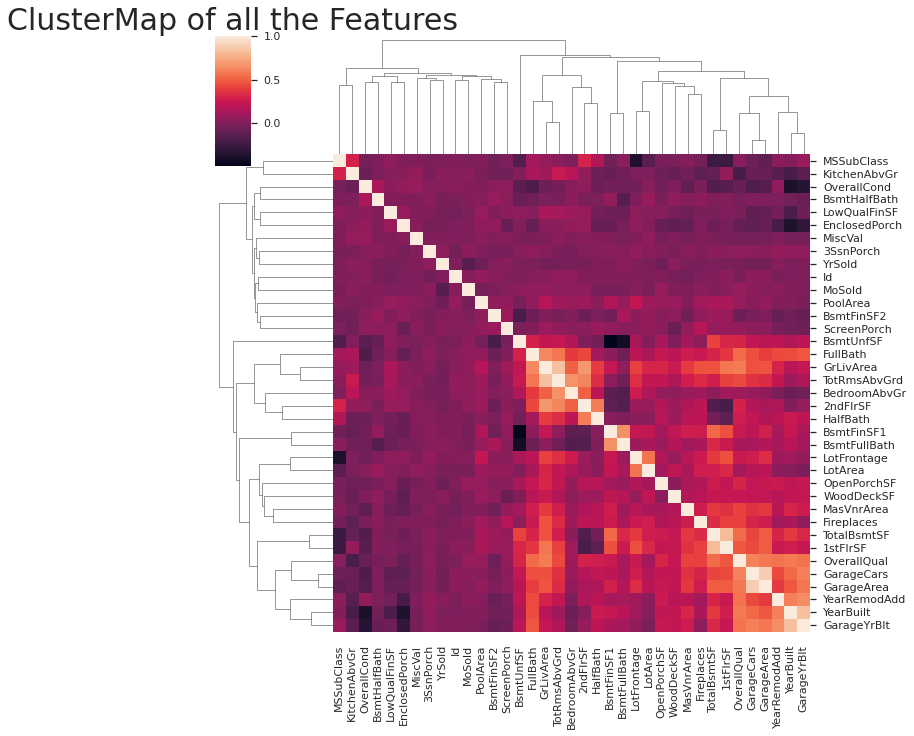

In [15]:
plt.figure(figsize=(30, 30))
sns.clustermap(train.drop(columns = ['SalePrice']).corr(), xticklabels=True, yticklabels=True)
plt.title("ClusterMap of all the Features", fontsize = 30)
plt.show();

The clustermap arranges correlated features side-by-side. This way it is easier to identify correlated clusters of features (bright squares).  
As we can see, the multicollinearity still exists between various features (bright squares of 2 features or more). However, we will keep them for now for the sake of learning and let the models do the clean up later on. Let's go through some of the correlations. 

* **GarageYrBlt** and **YearBuilt**. 
* **TotRmsAbvGrd** and **GrLivArea**. 
* **GarageCars** and **GarageArea**. 
* **1stFlrSF** and **TotalBsmtSF**  

If we were using only multiple linear regression, it would have been better to delete one feature of each of these feature-pairs from the dataset to fit better multiple linear regression models.  
However since scikit learn modules makes it easy to implement them and get the best possible outcome, we will be using many algorithms.
Therefore, we will keep all the features for now. 

# Preparing data for training

Drop the **Id** column from both the train and test datasets

Save the targets into separate series called **y_train** and **y_test**

## Combining train and test datasets together
In this section we'll fill in missing values, and do some feature engineering and selection. Since these are operations we can apply to both the training and test set, will concatenate them so that we can do all the work at once.

We just need to add a column which indicates which rows came from which dataset.

In [ ]:
X_train['set'] = 'Train'
X_test['set'] = 'Test'

In [ ]:
all_data = pd.concat([X_train, X_test]).reset_index(drop=True)

Drop the target variable from all_data

## Missing values

Write a function that, given a dataframe df, creates a table with the number and percentage of missing values in each column, sorted in desceding order.

In [18]:
def missing_percentage(df):
    pass

What does your function output on all_data?

**Imputing Missing Values**

Some missing values are intentionally left blank, for example: In the Alley feature 
there are blank values meaning that there are no alley's in that specific house. 

Here is a list of all features for which a missing value should remain blank:

In [61]:
missing_val_col_true_none = ["Alley", "PoolQC", "MiscFeature", "Fence",
                   "FireplaceQu", "GarageType", "GarageFinish", 'GarageYrBlt',
                   "GarageQual", "GarageCond", 'BsmtQual', 'BsmtCond',
                   'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']

Replace all missing values with np.nan. Note that some missing values may be encoded with different value (e.g. None or 'None')

In the following features the null values indicate that the feature doesn't exist in the house, and therefore should be replaced with 0

In [63]:
missing_val_col_zero = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                    'TotalBsmtSF', 'BsmtFullBath',  'BsmtHalfBath', 
                    'GarageArea', 'GarageCars', 'MasVnrArea']

Replace missing values in the above columns by 0

Some missing values are actually missing. It is sometimes reasonable to fill them with the mean value of the feature (across all entries). This way, the mean the of feature is preserved.
We will use this method on the LotFrontage feature, however, instead of simply filling the missing values with the mean of the feature across the entire dataset, we will calculate the mean for every neighborhood independently.

Create a series, with neighborhood names as indices, containing the mean LotFrontage value **in X_train** of each neighborhood

Replace all missing values in all_data['LotFrontage'] by the mean LotFrontage in their neighborhood, according to X_train

**Question:** Why did we only use the X_train to calculate the mean?

**Answer: **


**Missing values in categorical features**

Some categorical features in the data are encoded as integers, even though they should be strings:

In [ ]:
all_data[['MSSubClass', 'YrSold', 'MoSold']].dtypes

Change these to string dtype

In [ ]:
all_data[['MSSubClass', 'YrSold', 'MoSold']].dtypes

Since in categorical features there is no concept of "mean", we will fill the missing values with the most common category. Replace missing values in the following features by their most common value (i.e. their <a href= "https://en.wikipedia.org/wiki/Mode_(statistics)#:~:text=The%20mode%20is%20the%20value,most%20likely%20to%20be%20sampled.">mode</a>)

In [ ]:
['SaleType','Functional','MSZoning','Utilities',
 'Exterior1st','Exterior2nd','KitchenQual',
 'SaleType','Electrical']

Check how many missing values are left undealt with. Notice that we are checking missing values only on features which we didn't fill with NaN on purpose.

So, there are no missing value left. 

## Creating New Features

Create new features called ['haspool','has2ndfloor','hasgarage','hasbsmt','hasfireplace'] which attain the value 1 if the house has the corresponding amenity (pool, 2nd floor etc) and 0 otherwise.

## Deleting features

Removing the features used to create the new features so avoid feature dependancy

Use value_counts() to check which features have low variability. Remove the 3 features with the lowest variability (take care not to remove the columns 'set', though)

**Question**: why have we decided to delete these features?

**Answer**: value_counts shows extremely low variablity of values. Therefore these features will probably not contribute to our model.

## Creating Dummy Variables. 


A dummy variable is a way to convert categorical variable into numerical variable used in regression to represent subgroups of the feature.  
For example: 
if we have a feature with 'yes' / 'no' categories, we would use a 0,1 dummy variable where a 1 is given for 'yes' and 0 for 'no'.  

Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups.  
This means that we don’t need to write out separate models for each subgroup.

Find all categorical features and use pd.get_dummies to replace them with dummy variable. Make sure to remove the original features from your dataframe.

## Spltting back to train and test
Split the all_data dataframe back to X_train and X_test

# Learning 

Before we start training models and comparing them, we need some notion of "quality" of a model, that will allow us to compare various models and choose the best one.

A most common such notion is the **Mean Squared Error (MSE)** which you have encountered in class. For a given label vector $y$ and predicted labels $\hat{y}$, we have $MSE(y, \hat{y})=\frac{1}{n}\sum_{i=1}^{n}{(y_i - \hat{y_i}) ^ 2}$.
First, let us consider a constant model - that is, a model that predicts the same value for all samples, regardless of their features.

**Question**: What is the constant model with the least MSE? Prove your answer. What is its MSE on our train and test set?

**Answer**:

Compute the MSE of your model against the constant model you found. Use sklearn.metrics.mean_squared_error. What is the model's score for the test set? What is its score for the training set?

In [24]:
from sklearn.metrics import mean_squared_error


## Now let's train a model using a single feature, GrLivArea, how much better is it?

In [25]:
from sklearn.linear_model import LinearRegression

initiate an instance of sklearn.linear_model.LinearRegression and use it to fit a model with 'GrLivArea' as its only features. What is its MSE on the train and test set? What is the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score">model's score</a> on these sets?


## OK, now lets try using all features

Fit a linear regression model on all fetures using the same package    

What is its MSE on the test and train set?

Cool! So adding more features and making our model more complex improves our model. Will more complex models always perform better than simpler models? 

## Let's try adding degree-2 polynomial features
that is, the square of every feature and the product of every pair of features

Use <a href=https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html>sklearn.preprocessing.PolynomialFeatures</a> to create a dataframe of all degree 2 combinations of features in your data, and apply a linear regression to the transformed dataset.

_Note:_ use <a href= "https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">sklearn.pipeline.Pipeline</a> to create a model that squares all features and predicts in one go. This will also be useful for future steps.

In [27]:
from sklearn.preprocessing import PolynomialFeatures

What is your new model's MSE on the training and test sets?

Oh dear! The train MSE is now almost 0, but the test score is even worse than that of the constant model. This is since the model is now over complicated and rather than learning the underlying structure of the data, it is memorizing the training data. This is called overfitting. One common way to combat this is by adding a regularization term, which penalizes models for overcomplicating and motivates them to choose simpler solution. 

Let's try adding an L1 regularization term (this is called the LASSO model), which adds the sum of absolute values of the weights to the loss. Use <a href= "https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html">sklearn.linear_model.Lasso</a> with an alpha value of 0.009 and see if the model improves.

In [29]:
from sklearn.linear_model import Lasso
lasso = Lasso(0.009)


This is a little better but still not as good as it should be. Let's try normalizing the data and see if that helps.

Use the <a href= "https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standard%20scaler#sklearn.preprocessing.StandardScaler"> sklearn.preprocessing.StandardScaler</a> to normalize your data to have mean 0 and std 1, and fit your model with the normalized data, after all steps above (lasso and deg-2 poly transformation).

In [30]:
from sklearn.preprocessing import StandardScaler

What is the MSE of your model on the training and test sets?

Good, we fixed the overfitting and even made a slight improvement.
Why is normalization important when adding regularization? What would happen if we normalize in unregularized linear regression?

# A note about regularization

In the unregularized setting, normalizing doesn't affect the solution. Consider $X, y$ and $A, b$ which minimizes $||AX+b - y||$. Now suppose we normalize $X$ to get $D(X-\bar{X})$ where $D$ is a diagonal matrix that scales $X$ - we now try to minimize $||AD(X-\bar{X})+b - y||$, but rewriting $A'=AD, b'=b - AD \bar{X}$ we see that we can move the normalization into the solution that minimizes with resepect to the unnormalized $X$. However, when adding regularization, we "punish" each feature based on the magnitude of its coefficient, so scaling a feature by $c$ and its coefficient by $\frac{1}{c}$  are no longer equivalent since we change the punishment for that coefficient. This means that we disproportionately punish features of smaller scale and the solution may become dominated by features of larger scale which require smaller coefficients to produce the same impact on the prediction